   ID Jenis Kelamin  Nilai rata-rata SMP Lembaga pendidikan kelas 10  \
0   1             M                67.00               Internasional   
1   2             M                79.33                      Negeri   
2   3             M                65.00                      Negeri   
3   4             M                56.00                      Negeri   
4   5             M                85.80                      Negeri   

   Nilai rata-rata SMA Lembaga pendidikan kelas 12 Jurusan saat SMA    IPK  \
0                91.00               Internasional         Commerce  58.00   
1                78.33                      Negeri          Science  77.48   
2                68.00                      Swasta             Arts  64.00   
3                52.00                      Swasta          Science  52.00   
4                73.60                      Negeri         Commerce  73.30   

  Program studi sarjana Pengalaman kerja sebelum lulus  \
0              Sci&Tech                 

/tmp/ipython-input-2651553263.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)


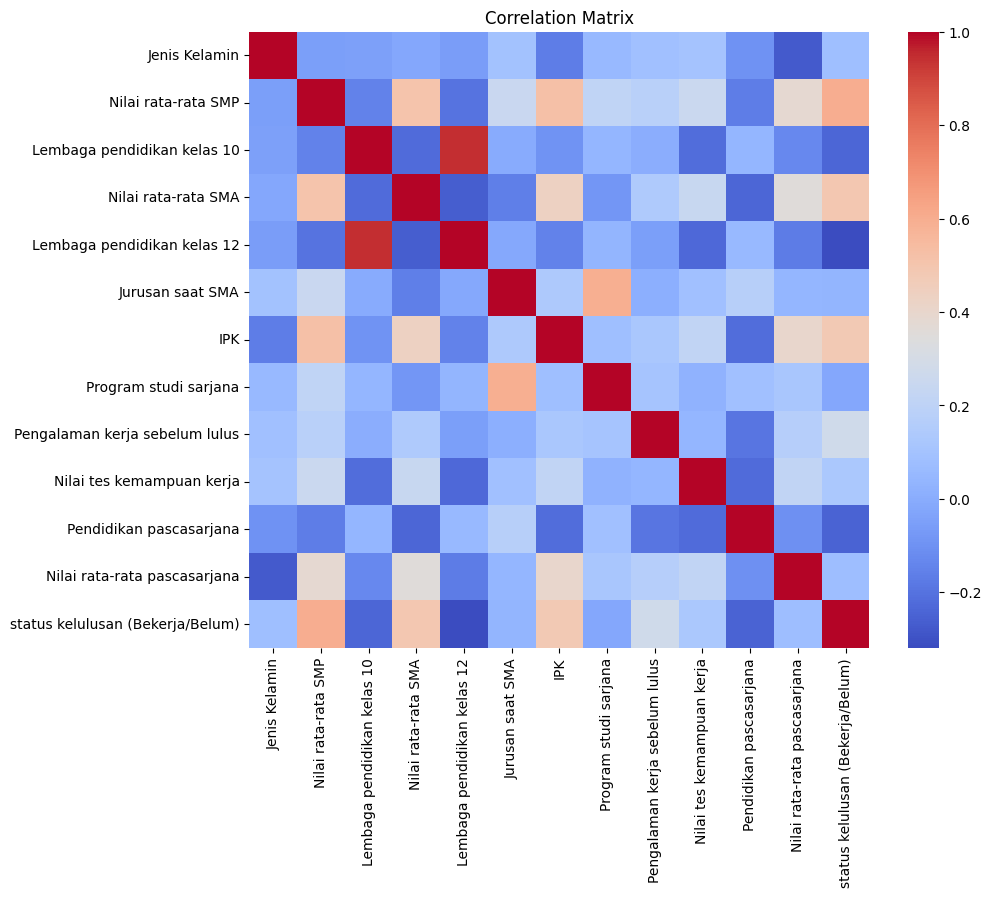

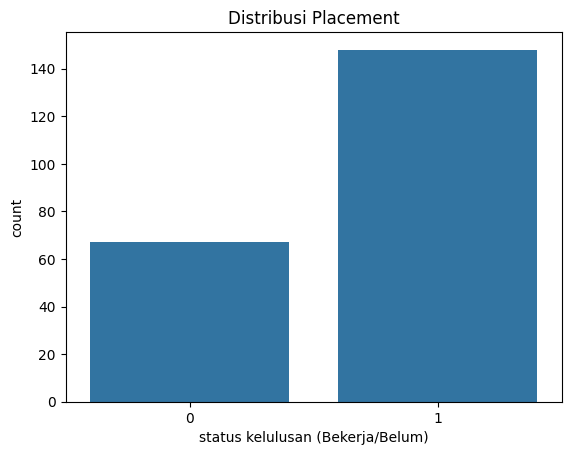

Logistic Regression Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43

Decision Tree Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.90      0.84      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.79      0.78        43
weighted avg       0.83      0.81      0.82        43

Random Forest Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81      

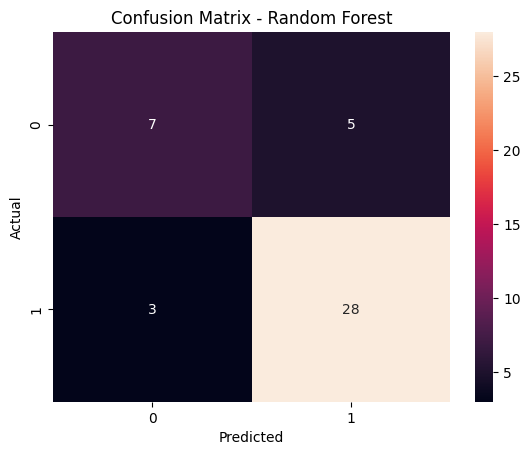

Nilai rata-rata SMP               0.303826
IPK                               0.195020
Nilai rata-rata SMA               0.155480
Nilai rata-rata pascasarjana      0.103743
Nilai tes kemampuan kerja         0.065242
Lembaga pendidikan kelas 12       0.052707
Pengalaman kerja sebelum lulus    0.035086
Pendidikan pascasarjana           0.024881
Lembaga pendidikan kelas 10       0.021097
Jenis Kelamin                     0.017898
Jurusan saat SMA                  0.016343
Program studi sarjana             0.008678
dtype: float64


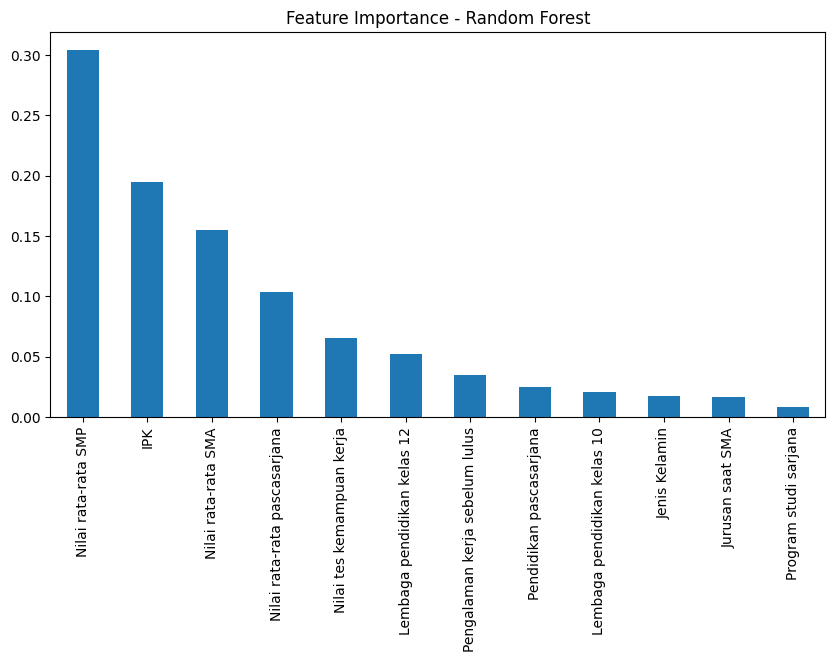

In [4]:
# ===============================
# IMPORT LIBRARY
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===============================
# LOAD DATA
# ===============================
df = pd.read_csv("Campus Recruitment.csv")

# ===============================
# DATA UNDERSTANDING
# ===============================
print(df.head())
print(df.info())
print(df.isnull().sum())

# ===============================
# DATA CLEANING
# ===============================

# Drop kolom ID jika ada
if 'ID' in df.columns: # Changed 'sl_no' to 'ID' based on df.head() output
    df.drop('ID', axis=1, inplace=True)

# Drop kolom Gaji (salary) karena hanya ada pada placed
if 'Gaji' in df.columns: # Changed 'salary' to 'Gaji' based on df.head() output
    df.drop('Gaji', axis=1, inplace=True)

# Handle NaNs in 'Jenis Kelamin' (categorical) before encoding by filling with mode
if 'Jenis Kelamin' in df.columns and df['Jenis Kelamin'].isnull().any():
    df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)

# Encoding kategorikal
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Impute remaining numerical NaNs with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# ===============================
# EXPLORATORY DATA ANALYSIS
# ===============================

# Korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribusi Placement
sns.countplot(x='status kelulusan (Bekerja/Belum)', data=df)
plt.title("Distribusi Placement")
plt.show()

# ===============================
# SPLIT DATA
# ===============================

X = df.drop('status kelulusan (Bekerja/Belum)', axis=1)
y = df['status kelulusan (Bekerja/Belum)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# MODEL 1 - LOGISTIC REGRESSION
# ===============================

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ===============================
# MODEL 2 - DECISION TREE
# ===============================

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# ===============================
# MODEL 3 - RANDOM FOREST
# ===============================

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ===============================
# CONFUSION MATRIX RANDOM FOREST
# ===============================

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# FEATURE IMPORTANCE
# ===============================

importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importances)

importances.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance - Random Forest")
plt.show()